In [2]:
# dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as st
from scipy.stats import linregress

from sklearn import datasets

# csvfile 
cash_rate = "Output/cleaned_cash_rate.csv"
umemployment = "Output/cleaned_unemployment rate.csv"

umemployment_rate = pd.read_csv(umemployment)
cash_rate1 = pd.read_csv(cash_rate)
umemployment_rate

,Month,Seasonally adjusted (%)
0,Feb-2013,5.4
1,Mar-2013,5.6
2,Apr-2013,5.6
3,May-2013,5.6
4,Jun-2013,5.7
...,...,...
116,Oct-2022,3.4
117,Nov-2022,3.5
118,Dec-2022,3.5
119,Jan-2023,3.7


In [3]:
cash_rate1

,Month,Cash Rate (%)
0,May-1976,7.71
1,Jun-1976,8.02
2,Jul-1976,7.57
3,Aug-1976,7.75
4,Sep-1976,7.46
...,...,...
558,Nov-2022,2.80
559,Dec-2022,3.01
560,Jan-2023,3.07
561,Feb-2023,3.26


In [4]:
merged_cash_rate_unemployment = pd.merge(cash_rate1, umemployment_rate, how="right", on=["Month"])

In [5]:
merged_cash_rate_unemployment.head()

,Month,Cash Rate (%),Seasonally adjusted (%)
0,Feb-2013,3.00,5.4
1,Mar-2013,3.00,5.6
2,Apr-2013,3.00,5.6
3,May-2013,2.80,5.6
4,Jun-2013,2.75,5.7


In [6]:
merged_cash_rate_unemployment

,Month,Cash Rate (%),Seasonally adjusted (%)
0,Feb-2013,3.00,5.4
1,Mar-2013,3.00,5.6
2,Apr-2013,3.00,5.6
3,May-2013,2.80,5.6
4,Jun-2013,2.75,5.7
...,...,...,...
116,Oct-2022,2.54,3.4
117,Nov-2022,2.80,3.5
118,Dec-2022,3.01,3.5
119,Jan-2023,3.07,3.7


In [7]:
merged_cash_rate_unemployment = merged_cash_rate_unemployment.rename(columns={
                                                "Seasonally adjusted (%)":"Seasonally adjusted unemployment (%)"})

In [8]:
merged_cash_rate_unemployment

,Month,Cash Rate (%),Seasonally adjusted unemployment (%)
0,Feb-2013,3.00,5.4
1,Mar-2013,3.00,5.6
2,Apr-2013,3.00,5.6
3,May-2013,2.80,5.6
4,Jun-2013,2.75,5.7
...,...,...,...
116,Oct-2022,2.54,3.4
117,Nov-2022,2.80,3.5
118,Dec-2022,3.01,3.5
119,Jan-2023,3.07,3.7


In [9]:
file = "Merged/merged_data.csv"

df = pd.read_csv(file)

df

,Month,GDP (million),Percent GDP,CPI,Percent CPI,Commodity Index,Seasonally adjusted unemployment (%),Owner Occ. Hsing Dbt / Inc,Interest Rates (%pa),Cash Rate (%),AUD/USD exchange rate
0,Jun-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
401,Sep-2022,553036.0,5.9,128.4,7.3,114.8,3.6,109.1,6.80,2.21,0.6502
402,Dec-2022,555690.0,2.7,130.8,7.8,107.9,3.5,108.8,7.55,3.01,0.6775
403,Mar-2023,NaN,NaN,NaN,NaN,106.2,NaN,NaN,NaN,3.51,0.6712
404,Jun-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Month', 'GDP (million)', 'Percent GDP', 'CPI', 'Percent CPI',
       'Commodity Index', 'Seasonally adjusted unemployment (%)',
       'Owner Occ. Hsing Dbt / Inc', 'Interest Rates (%pa)', 'Cash Rate (%)',
       'AUD/USD exchange rate'],
      dtype='object')

In [11]:
cash_rate_unemployment = df.loc[:, ["Month", "Cash Rate (%)","Seasonally adjusted unemployment (%)"]]
cash_rate_unemployment

,Month,Cash Rate (%),Seasonally adjusted unemployment (%)
0,Jun-1922,NaN,NaN
1,Sep-1922,NaN,NaN
2,Dec-1922,NaN,NaN
3,Mar-1923,NaN,NaN
4,Jun-1923,NaN,NaN
...,...,...,...
401,Sep-2022,2.21,3.6
402,Dec-2022,3.01,3.5
403,Mar-2023,3.51,NaN
404,Jun-2023,NaN,NaN


In [12]:
inter_condition_df = cash_rate_unemployment.loc[(cash_rate_unemployment["Cash Rate (%)"] >= 0) & (cash_rate_unemployment["Seasonally adjusted unemployment (%)"] >= 0) ]
inter_condition_df.head()

,Month,Cash Rate (%),Seasonally adjusted unemployment (%)
363,Mar-2013,3.00,5.6
364,Jun-2013,2.75,5.7
365,Sep-2013,2.50,5.7
366,Dec-2013,2.50,5.9
367,Mar-2014,2.50,5.9


In [13]:
x_axis = inter_condition_df["Month"]
x_axis

363    Mar-2013
364    Jun-2013
365    Sep-2013
366    Dec-2013
367    Mar-2014
368    Jun-2014
369    Sep-2014
370    Dec-2014
371    Mar-2015
372    Jun-2015
373    Sep-2015
374    Dec-2015
375    Mar-2016
376    Jun-2016
377    Sep-2016
378    Dec-2016
379    Mar-2017
380    Jun-2017
381    Sep-2017
382    Dec-2017
383    Mar-2018
384    Jun-2018
385    Sep-2018
386    Dec-2018
387    Mar-2019
388    Jun-2019
389    Sep-2019
390    Dec-2019
391    Mar-2020
392    Jun-2020
393    Sep-2020
394    Dec-2020
395    Mar-2021
396    Jun-2021
397    Sep-2021
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
Name: Month, dtype: object

In [14]:
cash_rate = inter_condition_df["Cash Rate (%)"]

In [15]:
unemployment_rate = inter_condition_df["Seasonally adjusted unemployment (%)"] 

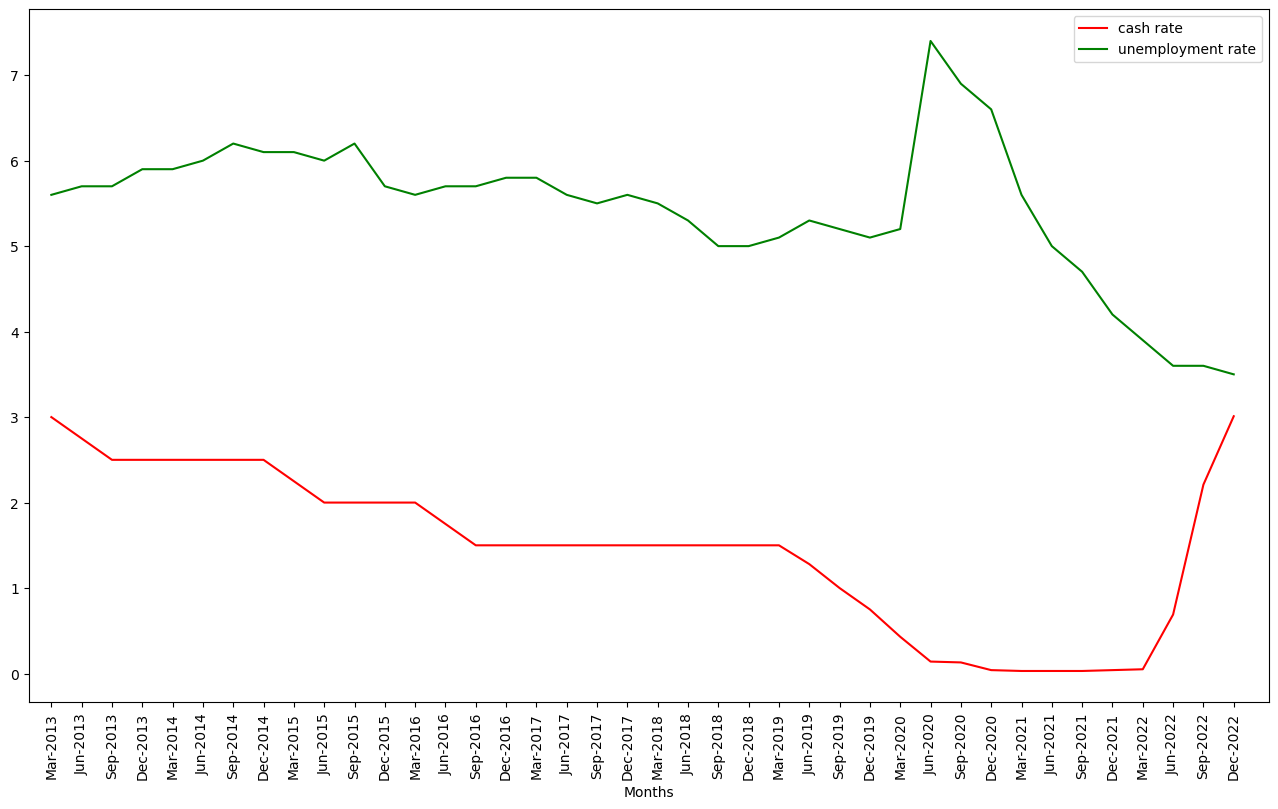

In [16]:
plt.figure(figsize = (16,9))
cashrate = plt.plot(x_axis, cash_rate,  color = "red", label = "cash rate")
unemploymentrate = plt.plot(x_axis, unemployment_rate,  color = "green", label = "unemployment rate")
plt.legend(loc="best")
plt.xticks(inter_condition_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.xlim(-0.75, len(inter_condition_df["Month"])+0.15)
plt.savefig("Output/international_condition.png")
plt.show()


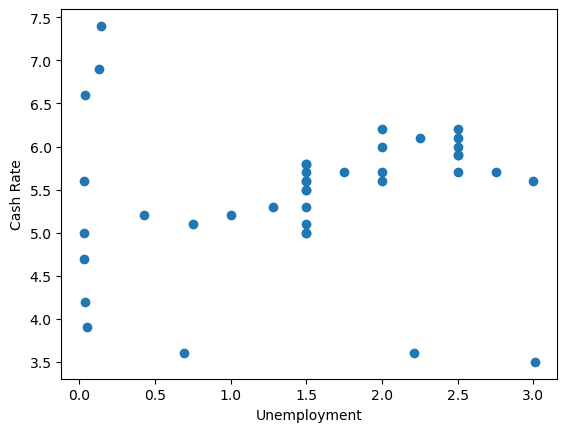

In [17]:
#Cash rate VS Unemployment rate 
plt.scatter(inter_condition_df.iloc[:,1], inter_condition_df.iloc[:,2])
plt.xlabel('Unemployment')
plt.ylabel('Cash Rate')
plt.show()

In [17]:
unemployment_rate = inter_condition_df.iloc[:,2]
cash_rate = inter_condition_df.iloc[:,1]
correlation = st.pearsonr(unemployment_rate,cash_rate)
print(f'The corrrelation between unemployment Rate and Cash Rate is {round(correlation[0],2)}')

The corrrelation between unemployment Rate and Cash Rate is 0.08


The r-squared is: 0.005674187281144802


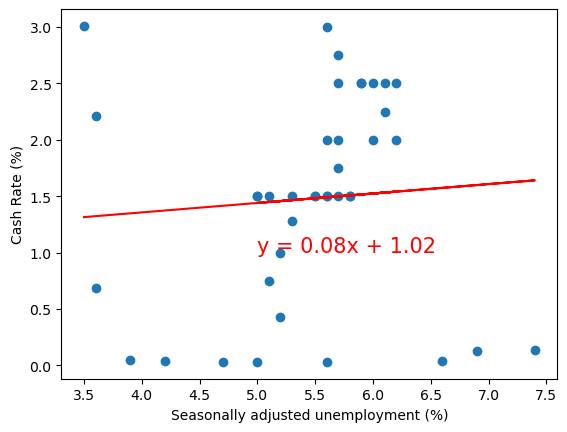

In [34]:
x_values = inter_condition_df["Seasonally adjusted unemployment (%)"]
y_values = inter_condition_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,1),fontsize = 15, color = "red")
plt.xlabel("Seasonally adjusted unemployment (%)")
plt.ylabel("Cash Rate (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()